In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from concurrent.futures import ThreadPoolExecutor
from multiprocessing import cpu_count
from nltk import word_tokenize
import nltk

In [2]:
from keras.layers import TextVectorization
import locale
import pickle
import tensorflow as tf
import os
import torch

In [3]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM, GRU, Input
from sklearn.model_selection import train_test_split


In [4]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
fake_data = pd.read_csv("/content/drive/MyDrive/Feke_News_detections/Fake.csv")

In [7]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
fake_data.shape

(23481, 4)

In [9]:
real_data = pd.read_csv("/content/drive/MyDrive/Feke_News_detections/True.csv")

In [11]:
real_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [12]:
real_data.shape

(21417, 4)

**Exploring Fake Dataset**

In [13]:
fake_data.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [14]:
counts = fake_data['subject'].value_counts()

<Axes: >

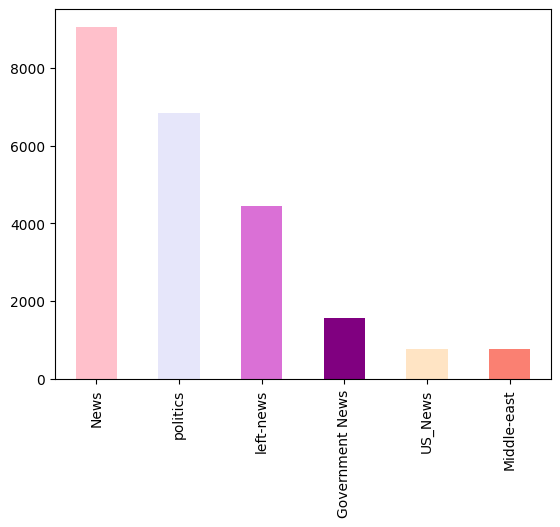

In [15]:
color = ['pink','lavender','orchid','purple','bisque','salmon']
counts.plot(kind='bar',color=color)


**WordCloud :- Word Cloud is a text visualization python package to visualize total no of words and how the words are actually distributed inside the text data.**

In [16]:
text = ' '.join(fake_data['text'].tolist())

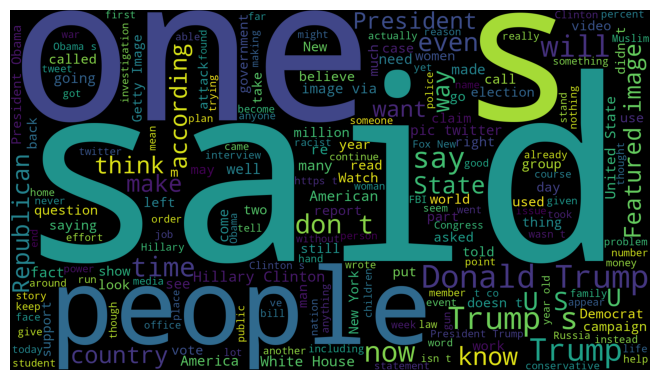

In [17]:
wordcloud = WordCloud(width=1920,height=1080).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Exploring real dataset**

In [18]:
real_data.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [19]:
count = real_data['subject'].value_counts()

<Axes: >

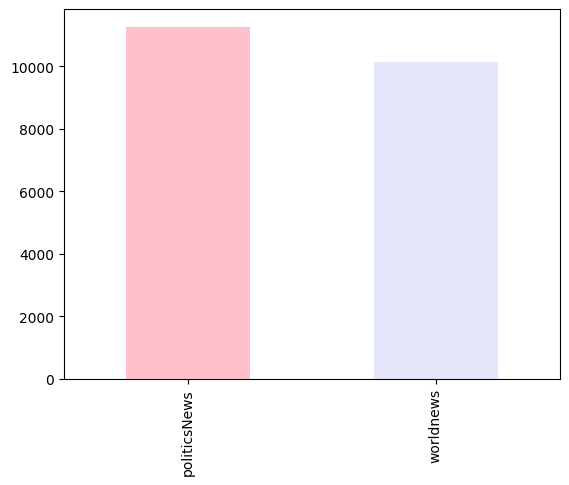

In [20]:
color = ['pink','lavender']
count.plot(kind='bar',color = color)

In [21]:
text = ' '.join(real_data['text'].tolist())

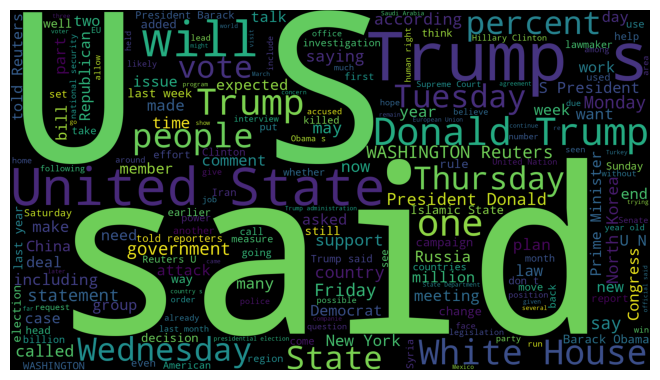

In [22]:
wordcloud = WordCloud(width=1920,height=1080).generate(text)
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

# Data Cleaning

In [23]:
unknown_publisher = []
for index , row in enumerate(real_data.text.values):
    try:
        record = row.split("-", maxsplit = 1)
        record[1]
        assert(len(record[0]) < 120)
    except:
        unknown_publisher.append(index)

In [24]:
len(unknown_publisher)

222

In [25]:
real_data.iloc[unknown_publisher].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [26]:
real_data.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [27]:
real_data.drop(8970,axis=0,inplace=True)

In [28]:
publishers = []
temp_textdata = []
for index , row in enumerate(real_data.text.values):
    if index in unknown_publisher:
        temp_textdata.append(row)
        publishers.append("Unknown")
    else:
        record = row.split("-", maxsplit =1)
        publishers.append(record[0].strip())
        temp_textdata.append(record[1].strip())

In [29]:
real_data['Publishers'] = publishers
real_data['text'] = temp_textdata

In [30]:
real_data.head()

,title,text,subject,date,Publishers
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [31]:

real_data.shape

(21416, 5)

In [32]:
emptyFakeIndex = [index for index , text in enumerate(fake_data.text.tolist()) if str(text).strip() == ""]

In [33]:
fake_data.iloc[emptyFakeIndex]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [34]:
real_data['text'] = real_data['title'] + " "+real_data['text']
fake_data['text'] = fake_data['title'] + " "+fake_data['text']

# Preprocessing Text

In [35]:
real_data['text'] = real_data['text'].apply(lambda x:str(x).lower())
fake_data['text'] = fake_data['text'].apply(lambda x:str(x).lower())

In [36]:
real_data.head()

,title,text,subject,date,Publishers
0,"As U.S. budget fight looms, Republicans flip t...","as u.s. budget fight looms, republicans flip t...",politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,u.s. military to accept transgender recruits o...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,senior u.s. republican senator: 'let mr. muell...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,fbi russia probe helped by australian diplomat...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,trump wants postal service to charge 'much mor...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [37]:
real_data['class'] = 1
fake_data['class'] = 0

In [38]:
real_data = real_data[['text','class']]


In [39]:
fake_data = fake_data[['text','class']]

In [40]:
allData = pd.concat([real_data, fake_data], ignore_index = True)

In [41]:
allData.sample(5)

,text,class
1395,white house welcomes efforts to study gun 'bum...,1
12610,venezuela's maduro says government wins 90 per...,1
8250,"after insult, u.s. and clinton call for dutert...",1
9889,u.s. poised to approve boeing fighter jet sale...,1
5651,mosley would have kept ecclestone at f1 helm f...,1


In [42]:
def remove_special_chars(text):
    without_space = re.sub(r'[^\w ]+', "", text)
    without_space = ' '.join(without_space.split())

    return without_space

In [43]:
with ThreadPoolExecutor(max_workers= 4) as pool:

    allData["text"] = list(pool.map(remove_special_chars,list(allData["text"])))

In [44]:
allData.head()

,text,class
0,as us budget fight looms republicans flip thei...,1
1,us military to accept transgender recruits on ...,1
2,senior us republican senator let mr mueller do...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge much more...,1


In [45]:
def tokenize_tweet_text(text):
    return word_tokenize(text)

In [46]:
with ThreadPoolExecutor(max_workers=4) as pool:
    allData["text"] = list(pool.map(tokenize_tweet_text,list(allData["text"])))

In [47]:
allData["text"][0]

['as',
 'us',
 'budget',
 'fight',
 'looms',
 'republicans',
 'flip',
 'their',
 'fiscal',
 'script',
 'the',
 'head',
 'of',
 'a',
 'conservative',
 'republican',
 'faction',
 'in',
 'the',
 'us',
 'congress',
 'who',
 'voted',
 'this',
 'month',
 'for',
 'a',
 'huge',
 'expansion',
 'of',
 'the',
 'national',
 'debt',
 'to',
 'pay',
 'for',
 'tax',
 'cuts',
 'called',
 'himself',
 'a',
 'fiscal',
 'conservative',
 'on',
 'sunday',
 'and',
 'urged',
 'budget',
 'restraint',
 'in',
 '2018',
 'in',
 'keeping',
 'with',
 'a',
 'sharp',
 'pivot',
 'under',
 'way',
 'among',
 'republicans',
 'us',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'on',
 'cbs',
 'face',
 'the',
 'nation',
 'drew',
 'a',
 'hard',
 'line',
 'on',
 'federal',
 'spending',
 'which',
 'lawmakers',
 'are',
 'bracing',
 'to',
 'do',
 'battle',
 'over',
 'in',
 'january',
 'when',
 'they',
 'return',
 'from',
 'the',
 'holidays',
 'on',
 'wednesday',
 'lawmakers',
 'will',
 'begin',
 'trying',
 'to',
 'pass',
 

In [48]:
type(allData["text"][0])
print(allData["text"][0])


['as', 'us', 'budget', 'fight', 'looms', 'republicans', 'flip', 'their', 'fiscal', 'script', 'the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues',

In [49]:
type(allData["text"])

pandas.core.series.Series

In [50]:
allData.shape

(44897, 2)

In [51]:
model = Word2Vec(sentences=allData["text"], vector_size=100, window=10, min_count=1, workers=4)

In [52]:
len(model.wv.key_to_index)

231867

In [53]:
model.wv['policy']

array([ 0.78771025,  2.3780549 ,  1.6243614 , -1.6432946 , -1.9711657 ,
        2.1169224 ,  0.09778246, -4.300262  , -3.7094033 ,  0.35384315,
        0.3427246 ,  1.1488925 ,  1.5729625 , -4.362226  , -3.573869  ,
        0.22738066,  3.8138623 , -0.48999354,  4.0316725 ,  5.1841903 ,
        3.2770646 , -1.3779613 ,  1.9502596 ,  0.20502435,  1.745027  ,
        2.0434072 ,  1.0975263 ,  2.5914526 ,  3.659866  , -0.91591024,
        3.4325075 , -3.5412629 ,  4.430137  ,  0.9879527 , -5.8630033 ,
       -0.21744327,  0.44103706,  2.914125  , -1.3310536 ,  1.3525014 ,
        3.459484  , -3.2610726 ,  0.6449616 , -2.1944776 , -3.4641762 ,
        1.6703292 , -0.9861449 ,  1.5885856 , -1.4107322 ,  3.496077  ,
       -0.8463441 ,  0.93766814,  0.5916677 , -1.4499239 , -1.8285397 ,
       -3.9903696 , -2.0832858 , -2.1019478 , -1.2835263 ,  2.2493474 ,
       -1.7643118 ,  3.5069597 , -5.14434   , -0.5686959 ,  1.7508359 ,
       -0.91397536, -3.3754404 , -1.3018775 , -2.9189374 , -5.84

In [54]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [55]:
tokenizer = Tokenizer()

In [56]:
tokenizer.fit_on_texts(allData['text'])

In [57]:
allData['text'] = tokenizer.texts_to_sequences(allData['text'])

In [58]:
allData['text'][0]

[18,
 30,
 473,
 480,
 10668,
 133,
 8088,
 40,
 1374,
 5171,
 1,
 419,
 3,
 4,
 301,
 79,
 6312,
 6,
 1,
 30,
 189,
 29,
 772,
 26,
 279,
 9,
 4,
 1106,
 2956,
 3,
 1,
 124,
 953,
 2,
 447,
 9,
 184,
 1192,
 173,
 393,
 4,
 1374,
 301,
 8,
 342,
 5,
 1109,
 473,
 7805,
 6,
 1187,
 6,
 1763,
 16,
 4,
 3407,
 7895,
 141,
 164,
 321,
 133,
 30,
 797,
 921,
 7806,
 675,
 8,
 2010,
 476,
 1,
 383,
 1760,
 4,
 559,
 589,
 8,
 168,
 691,
 50,
 408,
 28,
 17338,
 2,
 89,
 1351,
 66,
 6,
 410,
 60,
 32,
 775,
 25,
 1,
 8089,
 8,
 203,
 408,
 39,
 1437,
 350,
 2,
 928,
 4,
 168,
 473,
 6,
 4,
 480,
 304,
 2,
 23,
 1956,
 2,
 80,
 426,
 170,
 18,
 312,
 208,
 107,
 18,
 1,
 515,
 570,
 96,
 1780,
 1503,
 6,
 50,
 133,
 39,
 1071,
 2,
 377,
 349,
 3,
 189,
 37,
 69,
 14,
 5,
 19,
 133,
 182,
 4,
 379,
 473,
 958,
 6,
 169,
 691,
 110,
 196,
 62,
 182,
 12264,
 3554,
 9,
 17098,
 13037,
 691,
 8,
 1000,
 7,
 149,
 987,
 4132,
 1084,
 1462,
 166,
 306,
 5,
 1378,
 1203,
 1,
 14,
 151,
 21,
 294,
 4

In [59]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'said': 13,
 'trump': 14,
 'it': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'not': 22,
 'be': 23,
 'have': 24,
 'from': 25,
 'this': 26,
 'at': 27,
 'are': 28,
 'who': 29,
 'us': 30,
 'an': 31,
 'they': 32,
 'i': 33,
 'but': 34,
 'we': 35,
 'would': 36,
 'president': 37,
 'about': 38,
 'will': 39,
 'their': 40,
 'had': 41,
 'you': 42,
 't': 43,
 'been': 44,
 'were': 45,
 'people': 46,
 'more': 47,
 'or': 48,
 'after': 49,
 'which': 50,
 'she': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'its': 55,
 'out': 56,
 'all': 57,
 'what': 58,
 'state': 59,
 'when': 60,
 'new': 61,
 'also': 62,
 'up': 63,
 'can': 64,
 'there': 65,
 'over': 66,
 'no': 67,
 'house': 68,
 'donald': 69,
 'our': 70,
 'states': 71,
 'clinton': 72,
 'obama': 73,
 'government': 74,
 'just': 75,
 'him': 76,
 'so': 77,
 'than': 78,
 'republican': 79,
 'other': 80,
 'so

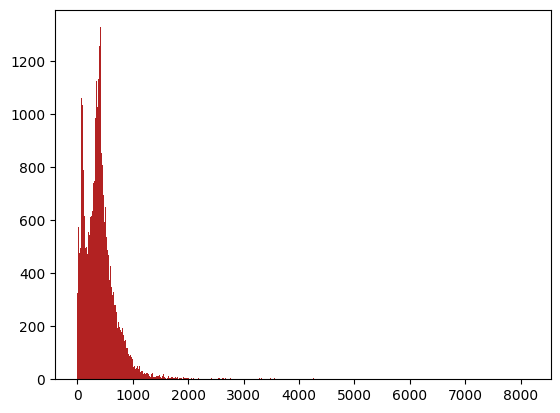

In [60]:
plt.hist([len(x) for x in allData['text']], bins =700,color="firebrick")
plt.show()

In [61]:
nos = np.array([len(x) for x in allData["text"]])
len(nos[nos>1000])

1584

In [62]:
maxlen = 1000
x = pad_sequences(allData["text"], maxlen = maxlen)

In [63]:
len(x[101])

1000

In [64]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [65]:
def get_weight_matrix(model):
    weight_matrix = np.zeros((vocab_size,100))

    for word, i in vocab.items():
        weight_matrix[i] = model.wv[word]

    return weight_matrix

In [66]:
embedding_vectors = get_weight_matrix(model)

In [67]:
embedding_vectors.shape

(231868, 100)

In [68]:
model = Sequential()

In [69]:
model.add(Embedding(vocab_size, output_dim=100, weights=[embedding_vectors], input_length = maxlen,trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['acc'])

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         23186800  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 23304177 (88.90 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 23186800 (88.45 MB)
_________________________________________________________________


In [71]:
y = allData["class"].values

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [73]:
model.fit(x_train, y_train, validation_split=0.3, epochs =6)

Epoch 1/6
737/737 [==============================] - 1218s 2s/step - loss: 0.1394 - acc: 0.9490 - val_loss: 0.0809 - val_acc: 0.9726
Epoch 2/6
352/737 [=============>................] - ETA: 8:56 - loss: 0.0602 - acc: 0.9791

KeyboardInterrupt: 

In [ ]:
y_pred = (model.predict(x_test)> =0.5).as_type(int)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
x = [' this is a news']

In [ ]:
x_test

In [ ]:
x = [' this is a news']
x = tokenizer.texts_to_sequences(allData['text'])
